<a href="https://colab.research.google.com/github/dabarbosa10/MachineLearning/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ClassificationLoan/train_Loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_original=df.copy()

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [8]:
df.shape

(614, 13)

In [9]:
#Frequency table of a variable will give us the count of each category
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#Normalize to get proportions
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

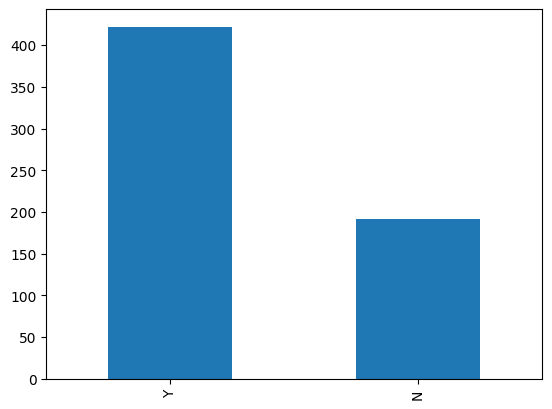

In [11]:
df['Loan_Status'].value_counts().plot.bar()

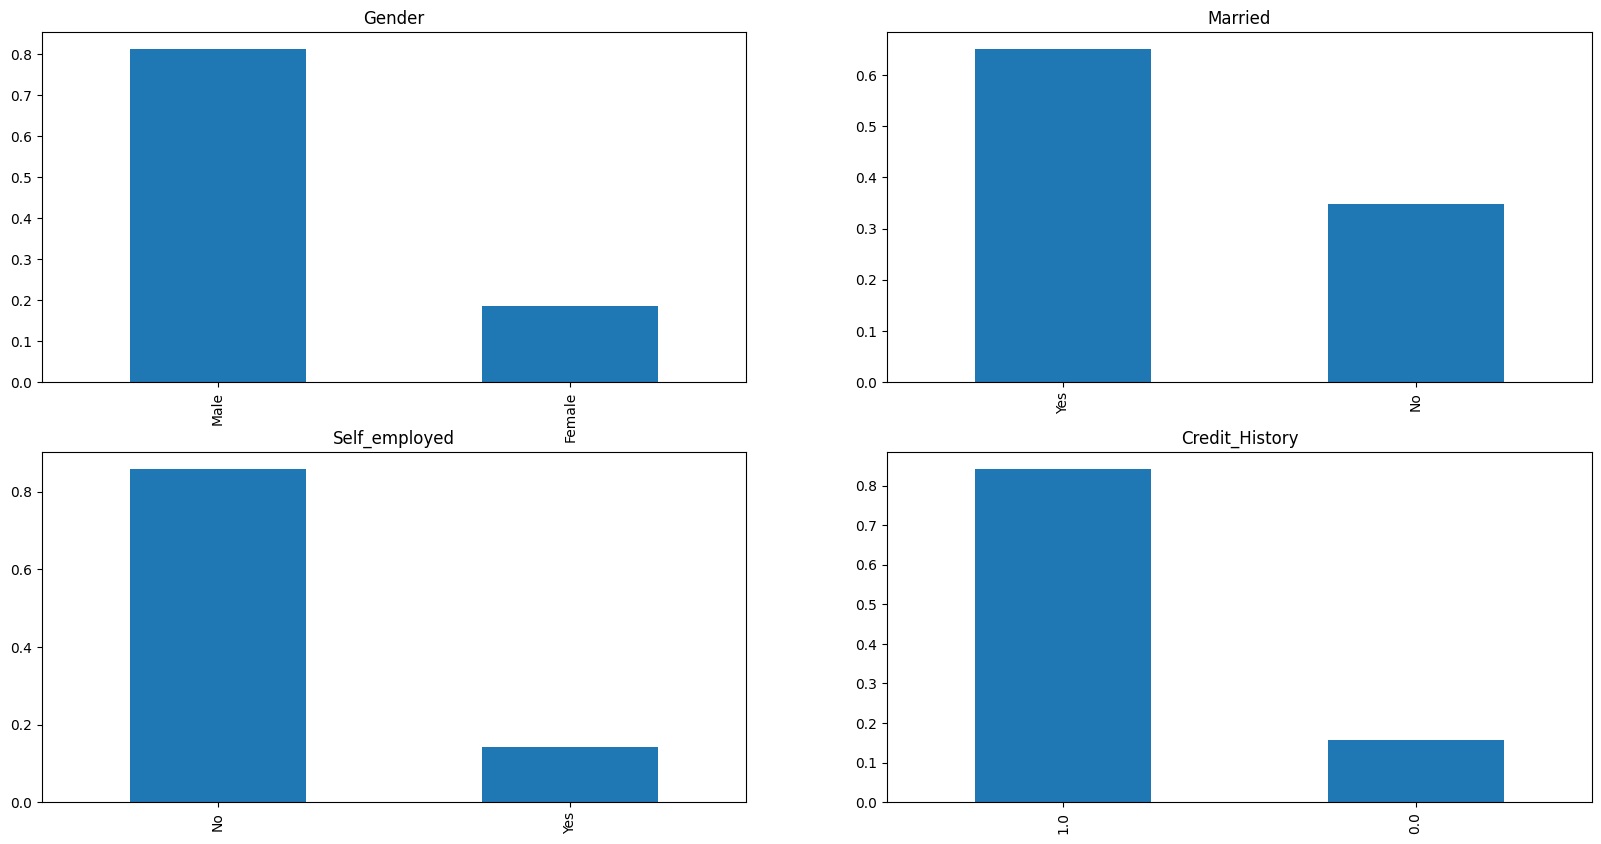

In [12]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

In [13]:
# 80% of the applicants are male
# Around 60% of the applicants are married
# 80% of the applicants are not self employed
# More than 80% have credit_history

<Axes: title={'center': 'Property_Area'}>

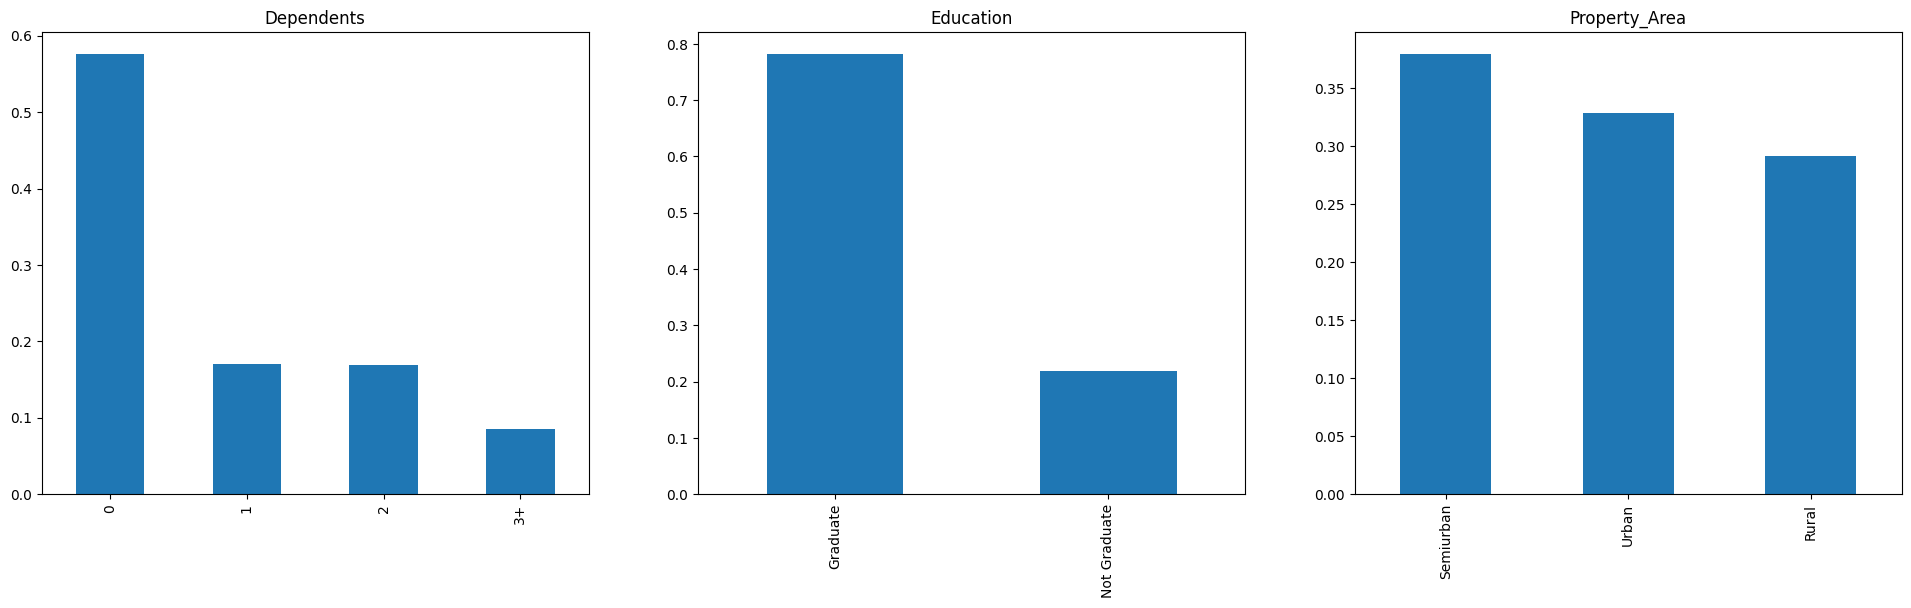

In [14]:
#Ordinal variables
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Property_Area')

In [15]:
# Almost 60% of the people do not have dependents
# Almost 80% of the people are graduated


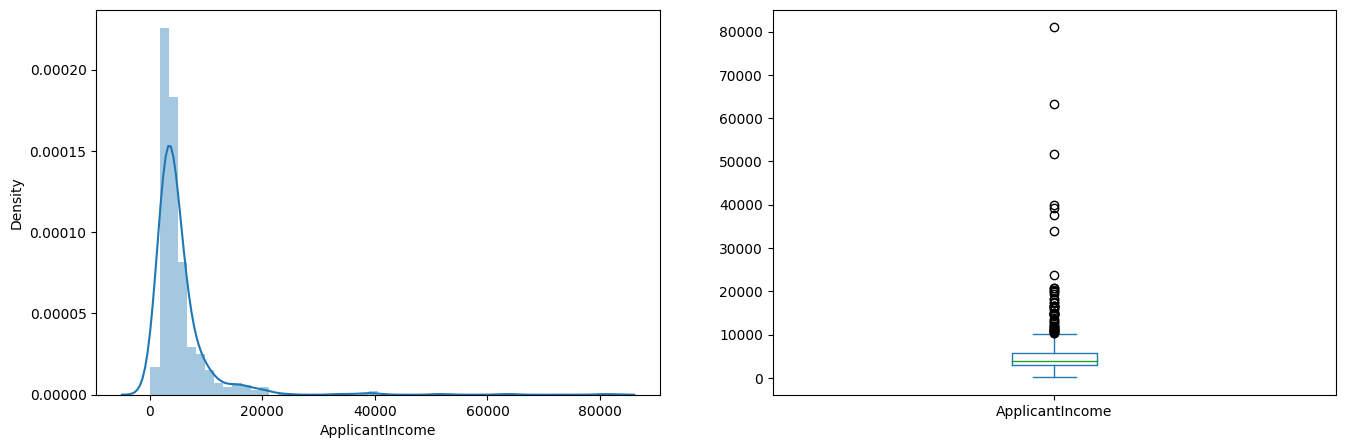

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

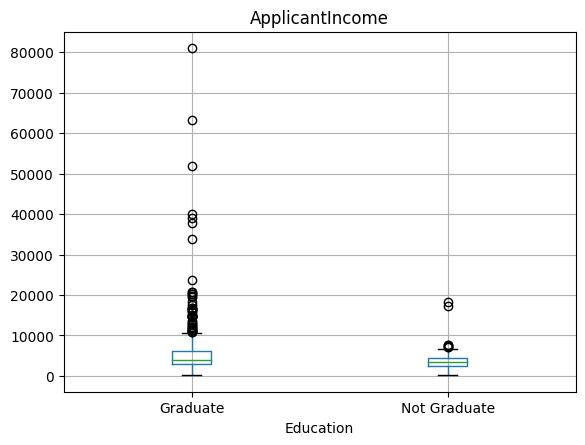

In [17]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

In [18]:
#Categorical Independent Variable vs Target Variable
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
print(Gender)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Axes: xlabel='Gender'>

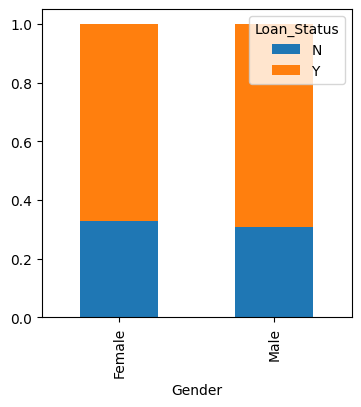

In [19]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [20]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
print(Married)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


In [22]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
print(Dependents)

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


In [23]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
print(Education)

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


In [24]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(Self_Employed)

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<Axes: xlabel='Married'>

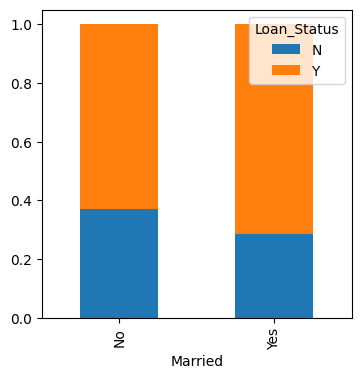

In [25]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

<Axes: xlabel='Dependents'>

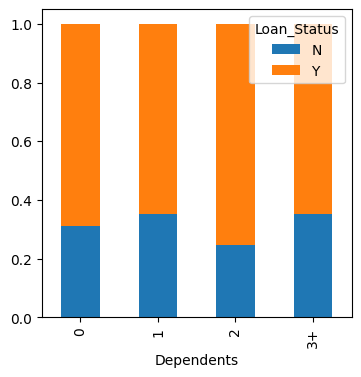

In [26]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

<Axes: xlabel='Education'>

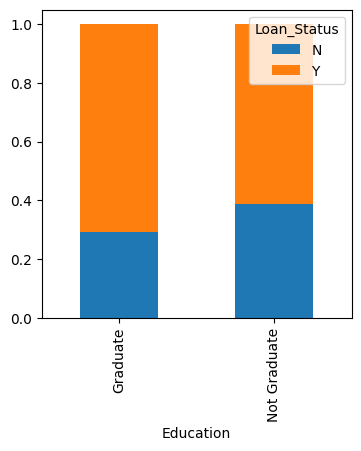

In [27]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

<Axes: xlabel='Self_Employed'>

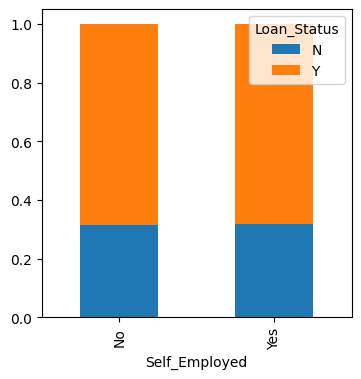

In [28]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [29]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(Credit_History)

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [30]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
print(Property_Area)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<Axes: xlabel='Credit_History'>

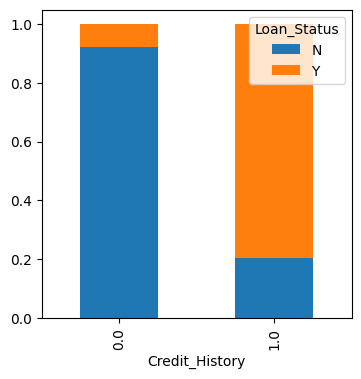

In [31]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

<Axes: xlabel='Property_Area'>

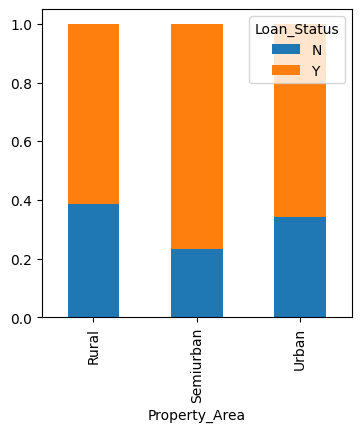

In [32]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Loan_Status'>

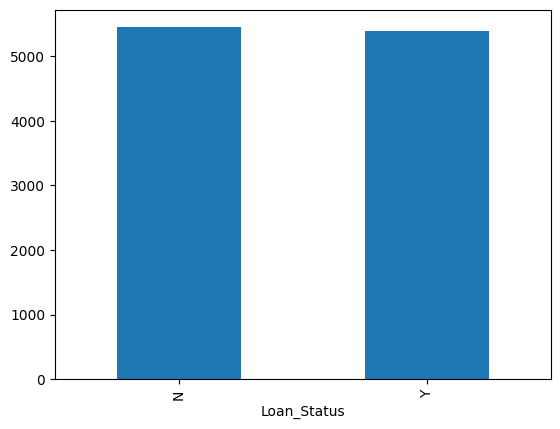

In [34]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [35]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high


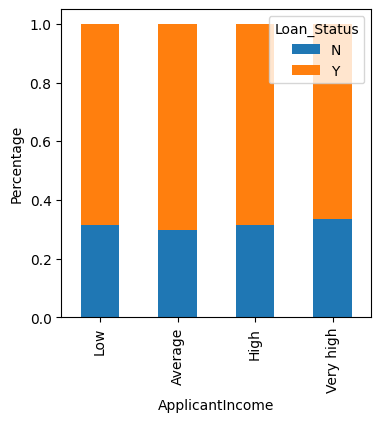

In [36]:
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')